### Network Architecture A 

- Layer 1 - 300 neurons (ReLU activation function)
- Layer 2 - SoftMax Layer (10 neurons)

In [0]:
# Colab has two versions of TensorFlow installed: a 1.x version and a 2.x version. 
# Colab currently uses TF 1.x by default
# To enable TF2 execute the following code

%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.2.0-rc2


### Importing the Libraries 

In [0]:
# Importing the libraries 
import tensorflow as tf
from keras.utils import np_utils
import numpy as np 
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Creation of 3 Functions

In [0]:
# -------------------------------------------CODE TO PREPARE THE DATASET---------------------------------------------------- 

def prepare_dataset(fashion_mnist):
  # load the training and test data    
  (tr_x, tr_y), (te_x, te_y) = fashion_mnist.load_data()
  # reshape the feature data
  tr_x = tr_x.reshape(tr_x.shape[0], 784)
  te_x = te_x.reshape(te_x.shape[0], 784)
  # noramlise feature data
  tr_x = tr_x / 255.0
  te_x = te_x / 255.0
  # one hot encode the training labels and get the transpose
  tr_y = np_utils.to_categorical(tr_y,10)
  tr_y = tr_y.T
  # one hot encode the test labels and get the transpose
  te_y = np_utils.to_categorical(te_y,10)
  te_y = te_y.T
  return tr_x, tr_y, te_x, te_y

# -----------------------------------CODE TO CALCULATE THE PROBABILITY OF EACH CLASS GIVEN THE TRAINING INSTANCE--------------------------------------

def forward_pass(X_train, W1, b1, W2, b2):
  """
  Return the predicted 10 class probabilities matrix for each of the training instances 
  """
  # Calculate the pre-activation outputs for each of the 300 neurons in the hidden layer for each of the training instance 
  # Will get 300 outputs for a single training instance in the form of (300*60000) matrix 
  # The size of the W1 is (300*784)
  # The size of the training feature matrix is (784*60000)
  # The size of the b1 is (300*1)
  A1=  tf.matmul(W1, X_train) + b1
  # Convert each element in A1 through relu activation function 
  H1= tf.math.maximum(A1, 0)
  # Calculate the pre-activation outputs for each of the 10 neurons in the softmax layer for each of the training instance 
  # Will get 10 outputs for a single training instance in the form of (10*60000) matrix 
  # The size of the W2 is (10*300)
  # The size of the H1 matrix is (300*60000)
  # The size of the bias matrix is (10*1)
  A2= tf.matmul(W2, H1) + b2
  # Calculate a new matrix where each element is e to the power of pre-activation outputs 
  exponential_matrix= tf.math.exp(A2)
  # Calculation of the final probabilities of each of the 10 classes for each instance in the training set 
  # Column wise sum calculation 
  column_sum= tf.reduce_sum(exponential_matrix, 0)
  # Divide each element by the column sum so that each column is the probability of each class of a single instance 
  H2= exponential_matrix/column_sum 
  # Set the range so that the loss does not come out to be nan 
  H2= tf.clip_by_value(H2 ,1e-10, 1.0) 
  
  return H2

# -------------------------------- CODE TO CALCULATE THE LOSS FOR THE CURRENT SET OF TUNABLE PARAMETERS / WEIGHTS-------------------------------------

def cross_entropy(y_train, y_pred_matrix):
  """
  Return the loss value given the predicted probabilities matrix and the actual probabilities matrix
  """
  # Compute the log of each element of the prediction matrix 
  log_matrix= tf.math.log(y_pred_matrix)
  # Multiply each element of the actual labels matrix with the log matrix 
  product_matrix= y_train *log_matrix
  # Take the negation of each element in the product matrix 
  negated_product_matrix= -1*(product_matrix)
  # Compute the cross entropy loss for each of the training instances 
  # This will contain individual loss for the all training instances 
  # This operation will perform the column wise sum 
  single_loss_matrix= tf.reduce_sum(negated_product_matrix, 0)
  # Compute the mean cross entropy loss 
  mean_loss= tf.reduce_mean(single_loss_matrix)

  return mean_loss

# ----------------------------------------- CALCULATION OF THE TRAINING AND TEST SET ACCURACY------------------------------------------------------

def return_labels(matrix):
  """
  Return the corrosponding class label for each vector of probability instance 
  """ 
  class_labels= tf.argmax(matrix) 
  
  return class_labels

def calculate_accuracy(feature_data, label_data, W1, b1, W2, b2):
  """ 
  Return the accuracy value (applicable for both train and the test set) for the given set of weights and the biases 
  """
  # Calculate the matrix of predicted probabilities through calling of forward pass 
  predicted_matrix= forward_pass(feature_data, W1, b1, W2, b2)
  # Get the class labels of the actual labels 
  actual_labels= return_labels(label_data)
  # Get the class labels of the predicted probabilities 
  predicted_labels= return_labels(predicted_matrix)
  # Get the correct prediction in the form of boolean array where 1 is correct prediction and 0 is the wrong prediction 
  correct_predictions= tf.cast(tf.equal(predicted_labels, actual_labels), tf.float32)
  # Calculate the accuracy 
  accuracy= tf.reduce_mean(correct_predictions)

  return accuracy 


### Beginning of TensorFlow program 

In [0]:
# Loading the fashion MNIST data-set 
fashion_mnist = tf.keras.datasets.fashion_mnist

# Prepare the dataset 
train_features, train_labels, test_features, test_labels= prepare_dataset(fashion_mnist)

# Get the transpose of feature data 
train_features= train_features.T 
test_features= test_features.T

# Print the shape of our 4 data structures 
print( "Shape of training features ", train_features.shape)
print ("Shape of training labels ", train_labels.shape)
print()
print( "Shape of test features ", test_features.shape)
print ("Shape of test labels ", test_labels.shape)
print()
print("The training process of our Softmax Neural Network begins.....")
print()

X_train= tf.cast(train_features, tf.float32)
y_train= tf.cast(train_labels, tf.float32)
X_test= tf.cast(test_features, tf.float32)
y_test= tf.cast(test_labels, tf.float32)

# Set the Number of features
num_features=  X_train.shape[0]
# We now specify the size of hidden layer 
hidden_neurons= 300
# We now specify the size of output layer 
output_neurons= 10 

# Initialize the weight_matrix 1 and bias_matrix 1 
# Each row of this matrix represents the 784 weights of a single neuron in the hidden layer 
W1= tf.Variable(tf.random.normal([hidden_neurons, num_features], mean=0.0, stddev=0.05))
# It is a column vector where each row/element represents the bias value for a single neuron in the hidden layer 
b1= tf.Variable(tf.random.normal([hidden_neurons, 1], mean=0.0, stddev=0.05))

# Initialize the weight_matrix 2 and bias_matrix 2 
# Each row of this matrix represents the 300 weights of a single neuron in the softmax layer 
W2= tf.Variable(tf.random.normal([output_neurons, hidden_neurons], mean=0.0, stddev=0.05))
# It is a column vector where each row/element represents the bias value for a single neuron in the softmax layer 
b2= tf.Variable(tf.random.normal([output_neurons, 1], mean=0.0, stddev=0.05))

# Set the learning rate and the number of iterations 
learning_rate= 0.01 
num_iterations= 1200

# Adam optimizer to update the weights of the neural network 
adam_optimizer= tf.keras.optimizers.Adam()

# Create the list to store the training accuracy and loss with each iteration 
training_loss= []
training_acc= []
# Create the list to store the test accuracy and loss with each iteration 
test_loss= []
test_acc= []

# Run the gradient descent to num_iterations number of times 
for iteration in range(num_iterations):

  # Create an instance of GradientTape to monitor the forward pass and loss calculations
  with tf.GradientTape() as tape:
    # Calculate the predicted probability matrix for the current weights and the biases for the training set
    y_pred_matrix= forward_pass(X_train, W1, b1, W2, b2)
    # Calculate the predicted probability matrix for the current weights and the biases for the test set
    y_pred_test= forward_pass(X_test, W1, b1, W2, b2)
    # Calculate the current training loss with the current predictions and the actual labels of the training set 
    current_loss_training= cross_entropy(y_train, y_pred_matrix)
    # Calculate the current test loss with the current prediction and the actual labels of the test set 
    current_loss_test= cross_entropy(y_test, y_pred_test)
  
  # Calculate the gradients (partial derivates) of the loss with respect to each of the tunable weights 
  gradients= tape.gradient(current_loss_training, [W1, b1, W2, b2])

  # Calculate the training accuracy with each iteration 
  training_accuracy= calculate_accuracy(X_train, y_train, W1, b1, W2, b2)

  # Calculate the test accuracy with each each iteration 
  test_accuracy= calculate_accuracy(X_test, y_test, W1, b1, W2, b2)

  # Print out the current iteration, current loss and current training accuracy 
  print("Iteration ",iteration, ": Loss = ",current_loss_training.numpy()," Acc: ", training_accuracy.numpy(),   'Val_loss = ',current_loss_test.numpy(),   'Val_acc = ', test_accuracy.numpy())

  # Apply the Adam optimizer to update the weights and biases 
  adam_optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2]))

  # Append the 4 values (train loss, train acc, test loss, test acc) with the each current iteration for the plotting 
  training_loss.append(current_loss_training.numpy())
  training_acc.append(training_accuracy.numpy())
  test_loss.append(current_loss_test.numpy())
  test_acc.append(test_accuracy.numpy())

# Calculate the test accuracy with the final updated weights and the biases through adam optimizer after running for certain number of iterations 
final_test_accuracy= calculate_accuracy(X_test, y_test, W1, b1, W2, b2)

# Print the test accuracy 
print()
print("The final test accuracy of the Fashion MNIST dataset is {}".format(final_test_accuracy))

4423680/4422102 [==============================] - 0s 0us/step
Shape of training features  (784, 60000)
Shape of training labels  (10, 60000)

Shape of test features  (784, 10000)
Shape of test labels  (10, 10000)

The training process of our Softmax Neural Network begins.....

Iteration  0 : Loss =  2.363158  Acc:  0.13583334 Val_loss =  2.3650005 Val_acc =  0.133
Iteration  1 : Loss =  2.063843  Acc:  0.37495 Val_loss =  2.0672977 Val_acc =  0.3728
Iteration  2 : Loss =  1.8467673  Acc:  0.47941667 Val_loss =  1.8520566 Val_acc =  0.4695
Iteration  3 : Loss =  1.6607883  Acc:  0.57568336 Val_loss =  1.6674914 Val_acc =  0.5672
Iteration  4 : Loss =  1.4934042  Acc:  0.63528335 Val_loss =  1.5013287 Val_acc =  0.6302
Iteration  5 : Loss =  1.3512235  Acc:  0.65595 Val_loss =  1.3601416 Val_acc =  0.6513
Iteration  6 : Loss =  1.2354159  Acc:  0.66715 Val_loss =  1.24509 Val_acc =  0.6589
Iteration  7 : Loss =  1.1385405  Acc:  0.68043333 Val_loss =  1.148432 Val_acc =  0.6693
Iteratio

### Plot of Training/Validation Accuracy and Training/Validation Loss

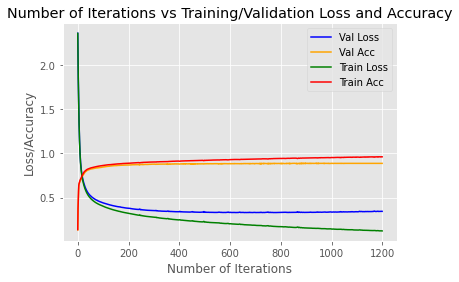


The final test accuracy of the Fashion MNIST dataset is 0.8876000046730042


In [0]:
plt.style.use("ggplot")
plt.figure()
plt.plot(test_loss, label="Val Loss", color='blue')
plt.plot(test_acc, label="Val Acc", color='orange')
plt.plot(training_loss, label="Train Loss", color='green')
plt.plot(training_acc, label="Train Acc", color='red')
plt.title("Number of Iterations vs Training/Validation Loss and Accuracy")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()
# Print the test accuracy 
print()
print("The final test accuracy of the Fashion MNIST dataset is {}".format(final_test_accuracy))